# Kullback-Leibler Divergence a.k.a Relative Entropy

Given two probability distribution $p(x)$ and $q(x)$ over a discrete random variable $X$, the relative entropy  $D(p||q)$ is defined as follows:



$$
\begin{aligned}
D(p||q)=\sum_{x\in X} p(x) log{\frac{p(x)}{q(x)}}
\end{aligned}
$$



In [1]:
import numpy as np
from collections import defaultdict

dec = 2 #determines the number of bins

def listToRange(l):
    d = defaultdict(int)
    
    for i in range(0,len(l)):
        key = round(l[i], dec) #d[key] stores number of numbers that rounded to temp
        if key in d:
            d[key] += 1
        else:
            d[key] = 1   
            
    return d        

def entropyBins(l):
    d = listToRange(l)
    s = 0.0 
    
    for k in d:
        p = d[k]*1.0/len(l)
        s -= p*np.log(p)
        
    return s

def divergenceBins(l1, l2):
        
    d1 = listToRange(l1)
    d2 = listToRange(l2)
    s = 0.0
    
    for i in set(d1.keys()) | set(d2.keys()):
        p1 = (d1[i] + 1)/(sum(list(d1.values())) + len(set(d1.keys()) | set(d2.keys()))) #psuedocounting allows all data to be factored in and the result is never infinity
        p2 = (d2[i] + 1)/(sum(list(d2.values())) + len(set(d1.keys()) | set(d2.keys()))) #the extra len accounts for each of the +1's in the psuedocounting
        s += p1*np.log(p1/p2)

    return s

def JSD(l1, l2):

    m = [0.0]*(len(l1)+len(l2))
    for i in range(len(l1)):
        m[i] = l1[i]
    for i in range(len(l2)):
        m[len(l1)+i-1] = l2[i]
    
    count = listToRange(m)
    for k in count:
        x = count[k]
        while x>count[k]/2+1:
            for i in range(len(m)):
                if round(m[i], dec) == int(k):
                    del m[i]
                    x -= 1
                    break

    return (divergenceBins(l1, m) + divergenceBins(l2, m))/2
    
    

## Example 5

* For probabilistic distirubtion $p(x)$, generate 1000 numbers following Poisson distribution $Pois(\lambda=5)$.
* For probabilistic distirubtion $q(x)$, generate 1000 numbers following Poisson distribution $Pois(\lambda=6)$.


1. Plot $p(x)$ and $q(x)$ in a graph. 
2. Compute entropy of $p(x)$
3. Compute entropy of $q(x)$
4. Compute KL divergence $D(q||p)$
5. Compute KL divergence $D(p||q)$

Entropy of p is 2.181235
Entropy of q is 2.268949
KL Divergence p||q is 0.083151
KL Divergence q||p is 0.092312
JS Divergence is 0.021315


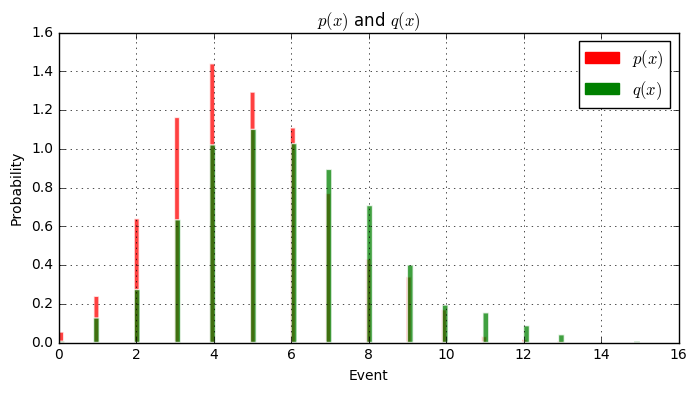

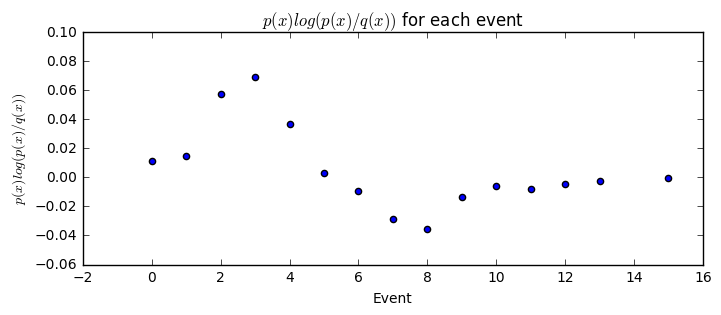

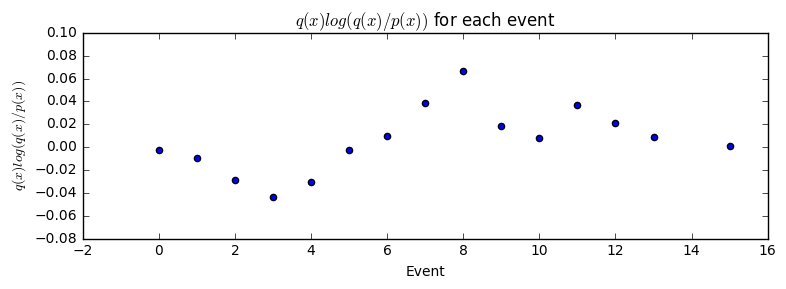

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

np.random.seed(0)
p = np.random.poisson(5, 1000)
q = np.random.poisson(6, 1000)

print("Entropy of p is %f" %entropyBins(p))
print("Entropy of q is %f" %entropyBins(q))

print("KL Divergence p||q is %f" %divergenceBins(p,q))
print("KL Divergence q||p is %f" %divergenceBins(q,p))

print("JS Divergence is %f" %JSD(p, q))

fig, ax = plt.subplots(figsize=(8,4))
ax.set_xlabel('Event')
ax.set_ylabel('Probability')
ax.set_title('$p(x)$ and $q(x)$')
ax.hist(p, pow(10, dec), normed=1, histtype='stepfilled', edgecolor='w', facecolor='r', alpha=0.75)
ax.hist(q, pow(10, dec), normed=1, histtype='stepfilled', edgecolor='w', facecolor='g', alpha=0.75)

plt.grid(True)

red_patch = mpatches.Patch(color='red', label='$p(x)$')
green_patch = mpatches.Patch(color='green', label='$q(x)$')
plt.legend(handles=[red_patch, green_patch])

d1 = listToRange(p)
d2 = listToRange(q)

fig, ax2 = plt.subplots(figsize=(8,3))
ax2.set_xlabel('Event')
ax2.set_ylabel('$p(x)log(p(x)/q(x))$')
ax2.set_title('$p(x)log(p(x)/q(x))$ for each event')
x = []
y = []
for i in set(d1.keys()) | set(d2.keys()):
    x.append(i)
    p1 = (d1[i] + 1)/(sum(list(d1.values())) + len(set(d1.keys()) | set(d2.keys()))) #psuedocounting allows all data to be factored in and the result is never infinity
    p2 = (d2[i] + 1)/(sum(list(d2.values())) + len(set(d1.keys()) | set(d2.keys()))) #the extra len accounts for each of the +1's in the psuedocounting
    y.append(p1*np.log(p1/p2))
    
ax2.scatter(x, y)

fig, ax3 = plt.subplots(figsize=(8,3))
ax3.set_xlabel('Event')
ax3.set_ylabel('$q(x)log(q(x)/p(x))$')
ax3.set_title('$q(x)log(q(x)/p(x))$ for each event')
x = []
y = []
for i in set(d1.keys()) | set(d2.keys()):
    x.append(i)
    p1 = (d1[i] + 1)/(sum(list(d1.values())) + len(set(d1.keys()) | set(d2.keys()))) #psuedocounting allows all data to be factored in and the result is never infinity
    p2 = (d2[i] + 1)/(sum(list(d2.values())) + len(set(d1.keys()) | set(d2.keys()))) #the extra len accounts for each of the +1's in the psuedocounting
    y.append(p2*np.log(p2/p1))
    
ax3.scatter(x, y)


fig.tight_layout()
plt.show()

## Example 6

* For probabilistic distirubtion $p(x)$, generate 1000 numbers following Poisson distribution $Pois(\lambda=7)$.
* For probabilistic distirubtion $q(x)$, generate 1000 numbers following Poisson distribution $Pois(\lambda=7)$.


1. Plot $p(x)$ and $q(x)$ in a graph. 
2. Compute entropy of $p(x)$
3. Compute entropy of $q(x)$
4. Compute KL divergence $D(q||p)$
5. Compute KL divergence $D(p||q)$

Entropy of p is 2.335158
Entropy of q is 2.337972
KL Divergence p||q is 0.007011
KL Divergence q||p is 0.007278
JS Divergence is 0.002357


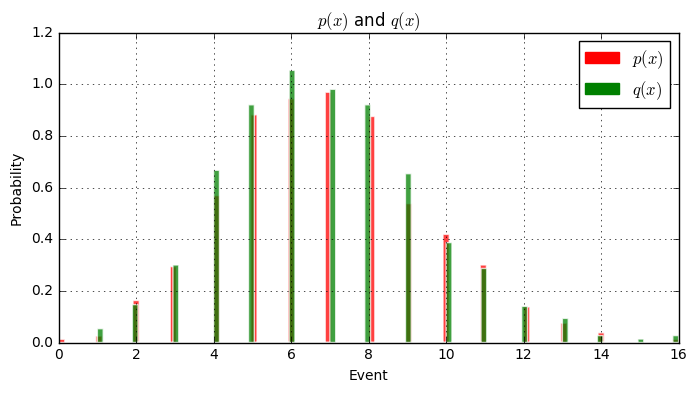

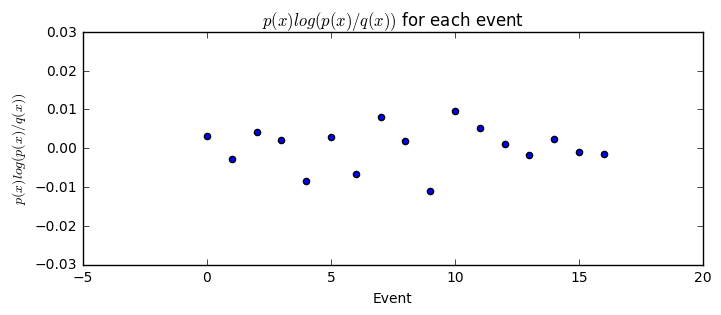

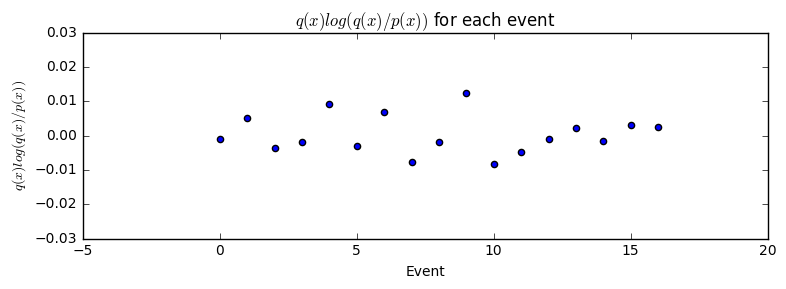

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

np.random.seed(0)
p = np.random.poisson(7, 1000)
q = np.random.poisson(7, 1000)

print("Entropy of p is %f" %entropyBins(p))
print("Entropy of q is %f" %entropyBins(q))

print("KL Divergence p||q is %f" %divergenceBins(p,q))
print("KL Divergence q||p is %f" %divergenceBins(q,p))

print("JS Divergence is %f" %JSD(p, q))

fig, ax = plt.subplots(figsize=(8,4))
ax.set_xlabel('Event')
ax.set_ylabel('Probability')
ax.set_title('$p(x)$ and $q(x)$')
ax.hist(p, pow(10, dec), normed=1, histtype='stepfilled', edgecolor='w', facecolor='r', alpha=0.75)
ax.hist(q, pow(10, dec), normed=1, histtype='stepfilled', edgecolor='w', facecolor='g', alpha=0.75)

plt.grid(True)

red_patch = mpatches.Patch(color='red', label='$p(x)$')
green_patch = mpatches.Patch(color='green', label='$q(x)$')
plt.legend(handles=[red_patch, green_patch])

d1 = listToRange(p)
d2 = listToRange(q)

fig, ax2 = plt.subplots(figsize=(8,3))
ax2.set_xlabel('Event')
ax2.set_ylabel('$p(x)log(p(x)/q(x))$')
ax2.set_title('$p(x)log(p(x)/q(x))$ for each event')
x = []
y = []
for i in set(d1.keys()) | set(d2.keys()):
    x.append(i)
    p1 = (d1[i] + 1)/(sum(list(d1.values())) + len(set(d1.keys()) | set(d2.keys()))) #psuedocounting allows all data to be factored in and the result is never infinity
    p2 = (d2[i] + 1)/(sum(list(d2.values())) + len(set(d1.keys()) | set(d2.keys()))) #the extra len accounts for each of the +1's in the psuedocounting
    y.append(p1*np.log(p1/p2))
    
ax2.scatter(x, y)

fig, ax3 = plt.subplots(figsize=(8,3))
ax3.set_xlabel('Event')
ax3.set_ylabel('$q(x)log(q(x)/p(x))$')
ax3.set_title('$q(x)log(q(x)/p(x))$ for each event')
x = []
y = []
for i in set(d1.keys()) | set(d2.keys()):
    x.append(i)
    p1 = (d1[i] + 1)/(sum(list(d1.values())) + len(set(d1.keys()) | set(d2.keys()))) #psuedocounting allows all data to be factored in and the result is never infinity
    p2 = (d2[i] + 1)/(sum(list(d2.values())) + len(set(d1.keys()) | set(d2.keys()))) #the extra len accounts for each of the +1's in the psuedocounting
    y.append(p2*np.log(p2/p1))
    
ax3.scatter(x, y)

fig.tight_layout()
plt.show()